### **Importing libraries**

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
%matplotlib inline


Connecting **my google drive** to **google colab** for accessing datasets easly

In [85]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [86]:
path = "/content/drive/MyDrive/datasets/heart.csv"

Loading to pandas dataframe

In [87]:
df = pd.read_csv(path)

to see how many rows and columns are there in the dataset

In [88]:
df.shape

(303, 14)

displaying the first five rows

In [89]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


dispalying the last five rows

In [90]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


see information of the dataset

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


statistical discription of the dataset

In [92]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


checking if there is misssing value

In [93]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


to see counts on each class

In [94]:
count = [df['target'],df['sex'],df['fbs'],df['exang']]

In [95]:
for i in count:
  print(i.value_counts())

target
1    165
0    138
Name: count, dtype: int64
sex
1    207
0     96
Name: count, dtype: int64
fbs
0    258
1     45
Name: count, dtype: int64
exang
0    204
1     99
Name: count, dtype: int64


visualizing the dataset to see what it looks like

the categorical features

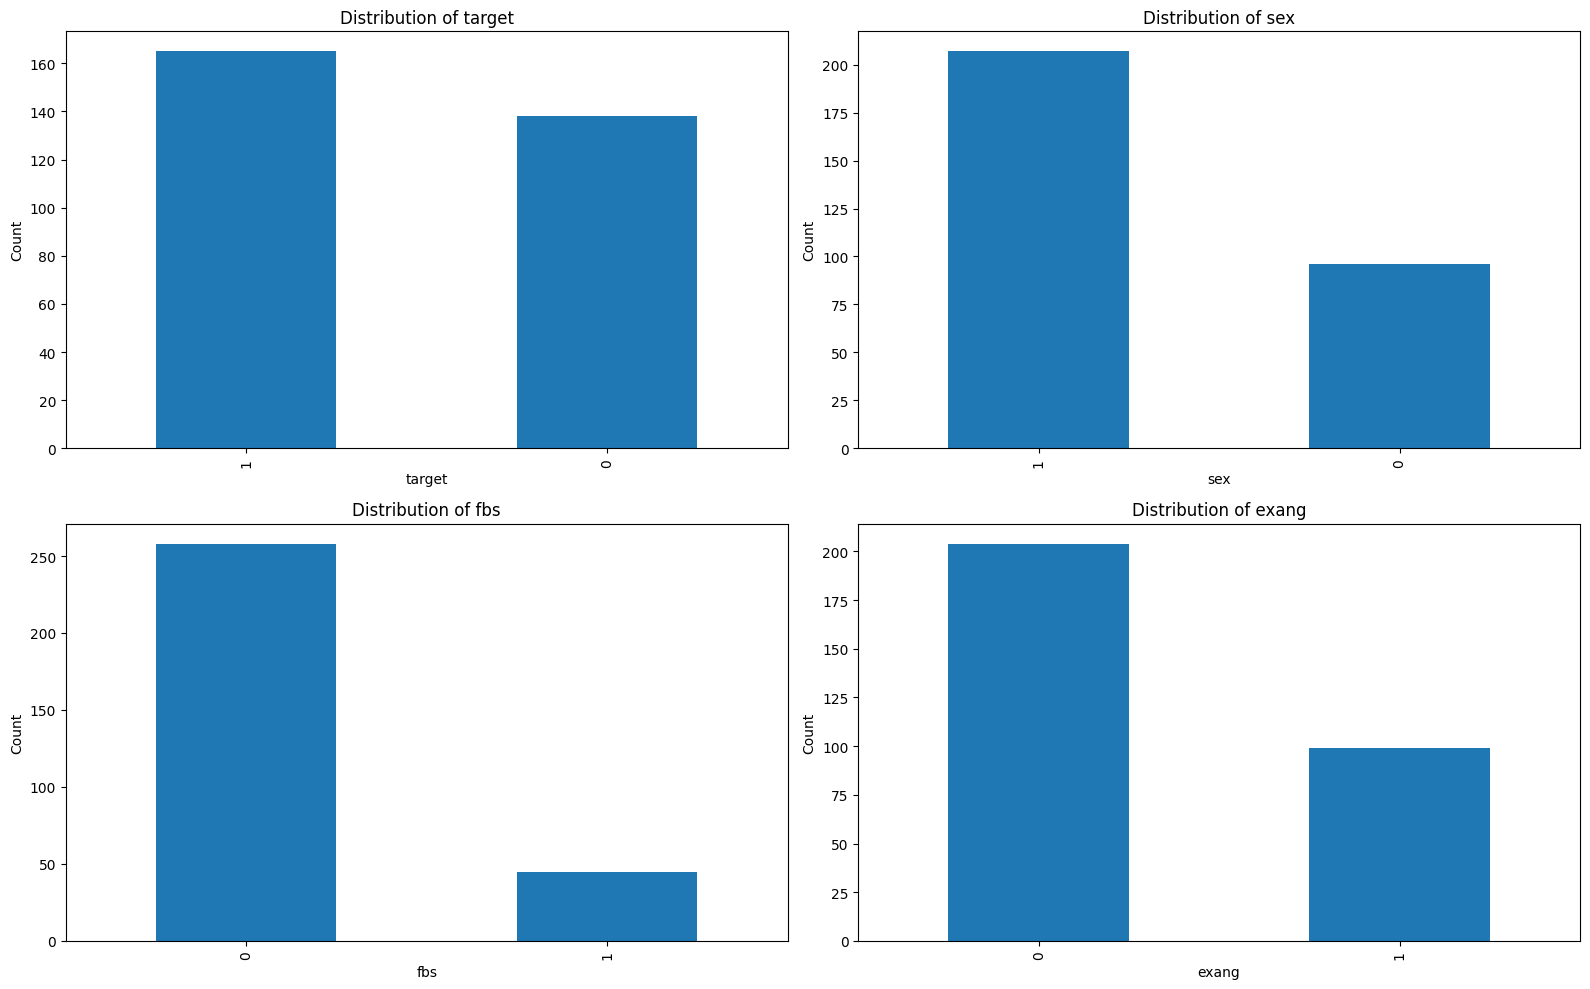

In [96]:
# List of categorical columns
count = [df['target'], df['sex'], df['fbs'], df['exang']]

# Create 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()  # Flatten to a 1D array

# Plot value counts for each column
for j, co in enumerate(count):
    co.value_counts().plot(kind='bar', ax=axes[j])
    axes[j].set_title(f'Distribution of {co.name}')
    axes[j].set_xlabel(co.name)
    axes[j].set_ylabel('Count')

plt.tight_layout()
plt.show()


separating dependent and independent variables (feature vs target )

In [97]:
X=df.drop('target',axis=1)
Y = df['target']

In [98]:
X.shape

(303, 13)

In [99]:
Y.shape

(303,)

data standaridazion

In [115]:
scalar = StandardScaler()
x_scaled = scalar.fit_transform(X)

train test split

In [116]:
x_train,x_test,y_train,y_true = train_test_split(x_scaled,Y,test_size = 0.2 ,stratify=Y,random_state=4)

In [117]:
print(x_train.shape,x_test.shape,y_train.shape,y_true.shape)

(242, 13) (61, 13) (242,) (61,)


model training and evaluation

In [118]:
models =[LogisticRegression(max_iter=1000),SVC(),DecisionTreeClassifier(),RandomForestClassifier()]

In [119]:
for model in models:
  #training the model
  model.fit(x_train,y_train)
  #predicting
  y_pred = model.predict(x_test)
  #evaluation
  # 1. Accuracy
  accuracy = accuracy_score(y_true,y_pred)
  print(f"Acccuracy : {model} =  {accuracy}")

  # 2. Precision
  precision = precision_score(y_true, y_pred)
  print(f'Precision : {model}={precision}')

  # 3. Recall
  recall = recall_score(y_true, y_pred)
  print(f'Recall : {model}={recall}')

  # 4. F1-Score
  f1 = f1_score(y_true, y_pred)
  print(f'F1-Score : {model}={f1}')

  # 5. Confusion Matrix
  conf_matrix = confusion_matrix(y_true, y_pred)
  print(f'Confusion Matrix :\n{model}={conf_matrix}')
  #any gap for readblity
  print("================================================================")


Acccuracy : LogisticRegression(max_iter=1000) =  0.8688524590163934
Precision : LogisticRegression(max_iter=1000)=0.8205128205128205
Recall : LogisticRegression(max_iter=1000)=0.9696969696969697
F1-Score : LogisticRegression(max_iter=1000)=0.8888888888888888
Confusion Matrix :
LogisticRegression(max_iter=1000)=[[21  7]
 [ 1 32]]
Acccuracy : SVC() =  0.819672131147541
Precision : SVC()=0.7894736842105263
Recall : SVC()=0.9090909090909091
F1-Score : SVC()=0.8450704225352113
Confusion Matrix :
SVC()=[[20  8]
 [ 3 30]]
Acccuracy : DecisionTreeClassifier() =  0.7868852459016393
Precision : DecisionTreeClassifier()=0.7777777777777778
Recall : DecisionTreeClassifier()=0.8484848484848485
F1-Score : DecisionTreeClassifier()=0.8115942028985508
Confusion Matrix :
DecisionTreeClassifier()=[[20  8]
 [ 5 28]]
Acccuracy : RandomForestClassifier() =  0.8688524590163934
Precision : RandomForestClassifier()=0.8378378378378378
Recall : RandomForestClassifier()=0.9393939393939394
F1-Score : RandomForestCl